<a href="https://colab.research.google.com/github/joachinhimself/My-projects-/blob/main/Accuracy_Fetal_health_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mtick
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_health = pd.read_csv('/content/sample_data/fetal_health.csv')

In [4]:
df_health.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,1


In [5]:
df_health.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140,0.000,0.000,0.007,0.0,0.0,0.0,79,0.2,25,7.2,40,137,177,4,0,153,150,152,2,0,2
2122,140,0.001,0.000,0.007,0.0,0.0,0.0,78,0.4,22,7.1,66,103,169,6,0,152,148,151,3,1,2
2123,140,0.001,0.000,0.007,0.0,0.0,0.0,79,0.4,20,6.1,67,103,170,5,0,153,148,152,4,1,2
2124,140,0.001,0.000,0.006,0.0,0.0,0.0,78,0.4,27,7.0,66,103,169,6,0,152,147,151,4,1,2
2125,142,0.002,0.002,0.008,0.0,0.0,0.0,74,0.4,36,5.0,42,117,159,2,1,145,143,145,1,0,1


In [6]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

In [7]:
df_health.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

In [8]:
df_health.shape

(2126, 22)

In [9]:
df_health.columns.values

array(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations',
       'severe_decelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'], dtype=object)

In [10]:
df_health.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [11]:
df_health.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

Bivariant Analysis

In [12]:
df_health['fetal_health']

0       2
1       1
2       1
3       1
4       1
       ..
2121    2
2122    2
2123    2
2124    2
2125    1
Name: fetal_health, Length: 2126, dtype: int64

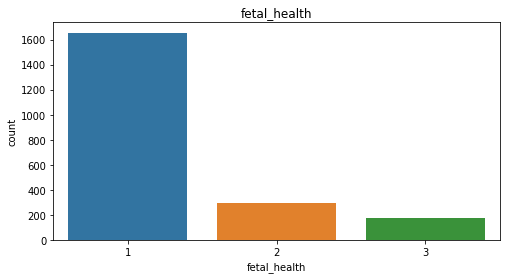

In [13]:
plt.figure(figsize = (8,4))
plt.title('fetal_health')
sns.countplot(x = 'fetal_health', data = df_health)

Univariant Analysis

In [14]:
activities = df_health.iloc[:,:-1]
activities.columns.values

array(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations',
       'severe_decelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f717d24ee10>,
      dtype=object)

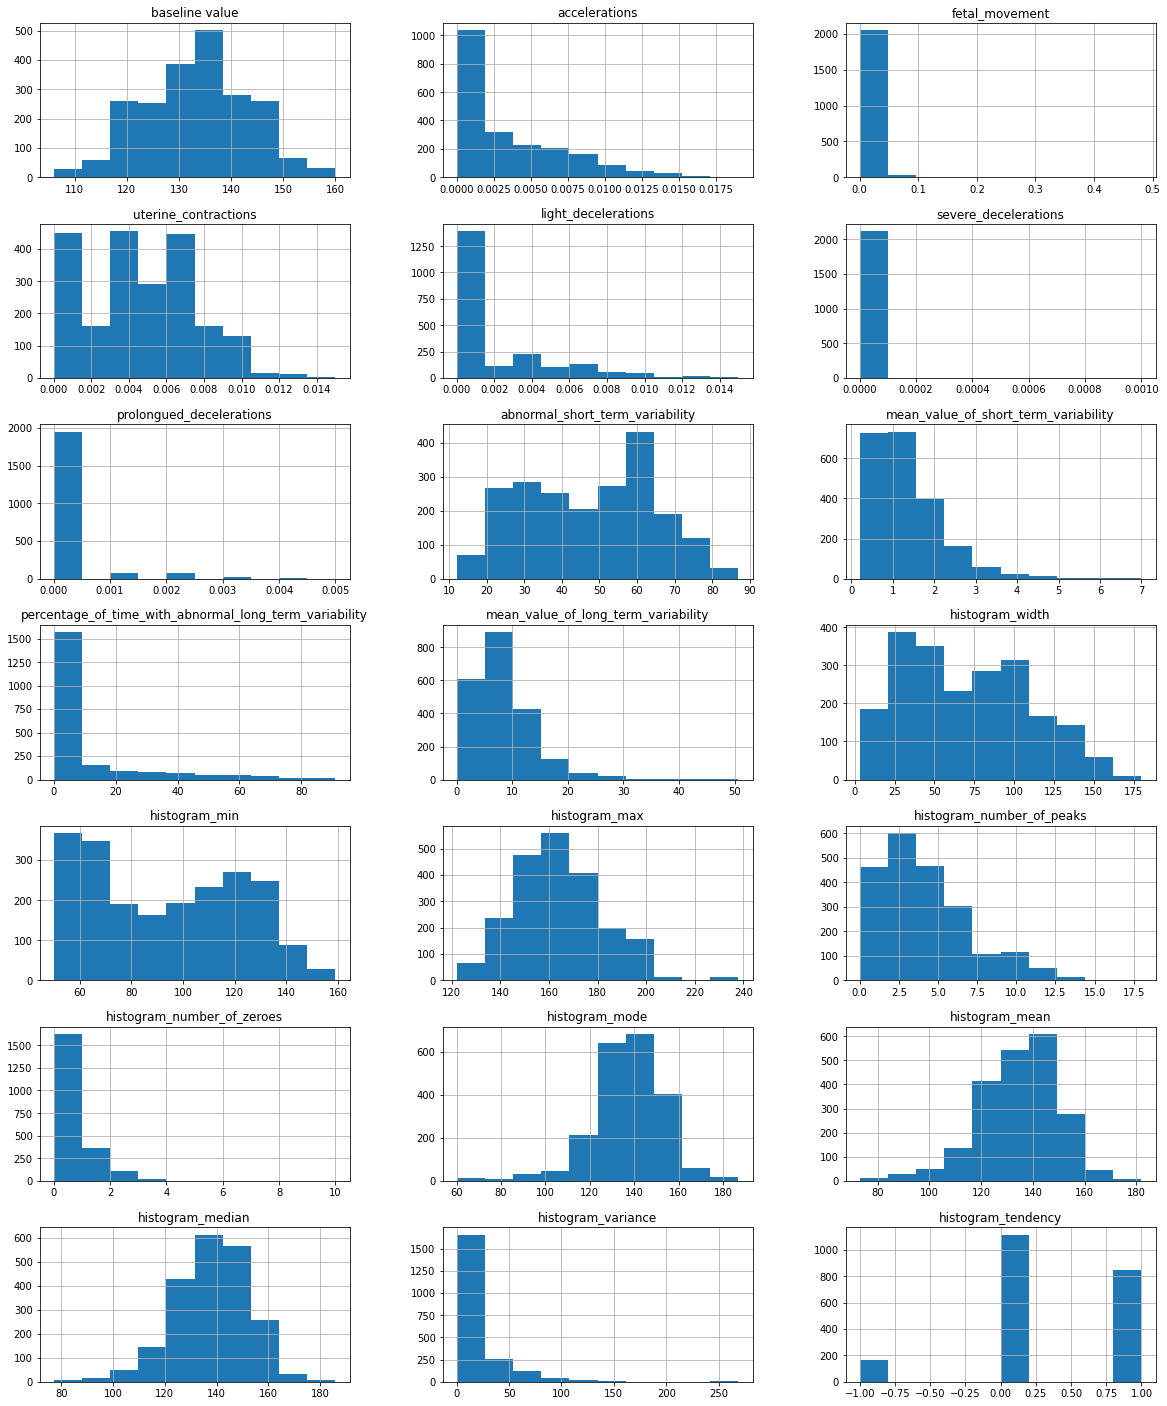

In [15]:
activities.hist(figsize=[20,25], layout=[7,3])

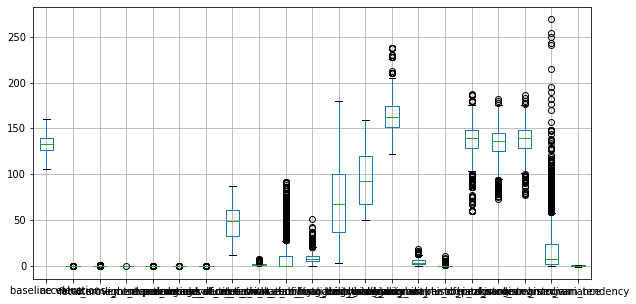

In [16]:
activities.boxplot(figsize=(10, 5))

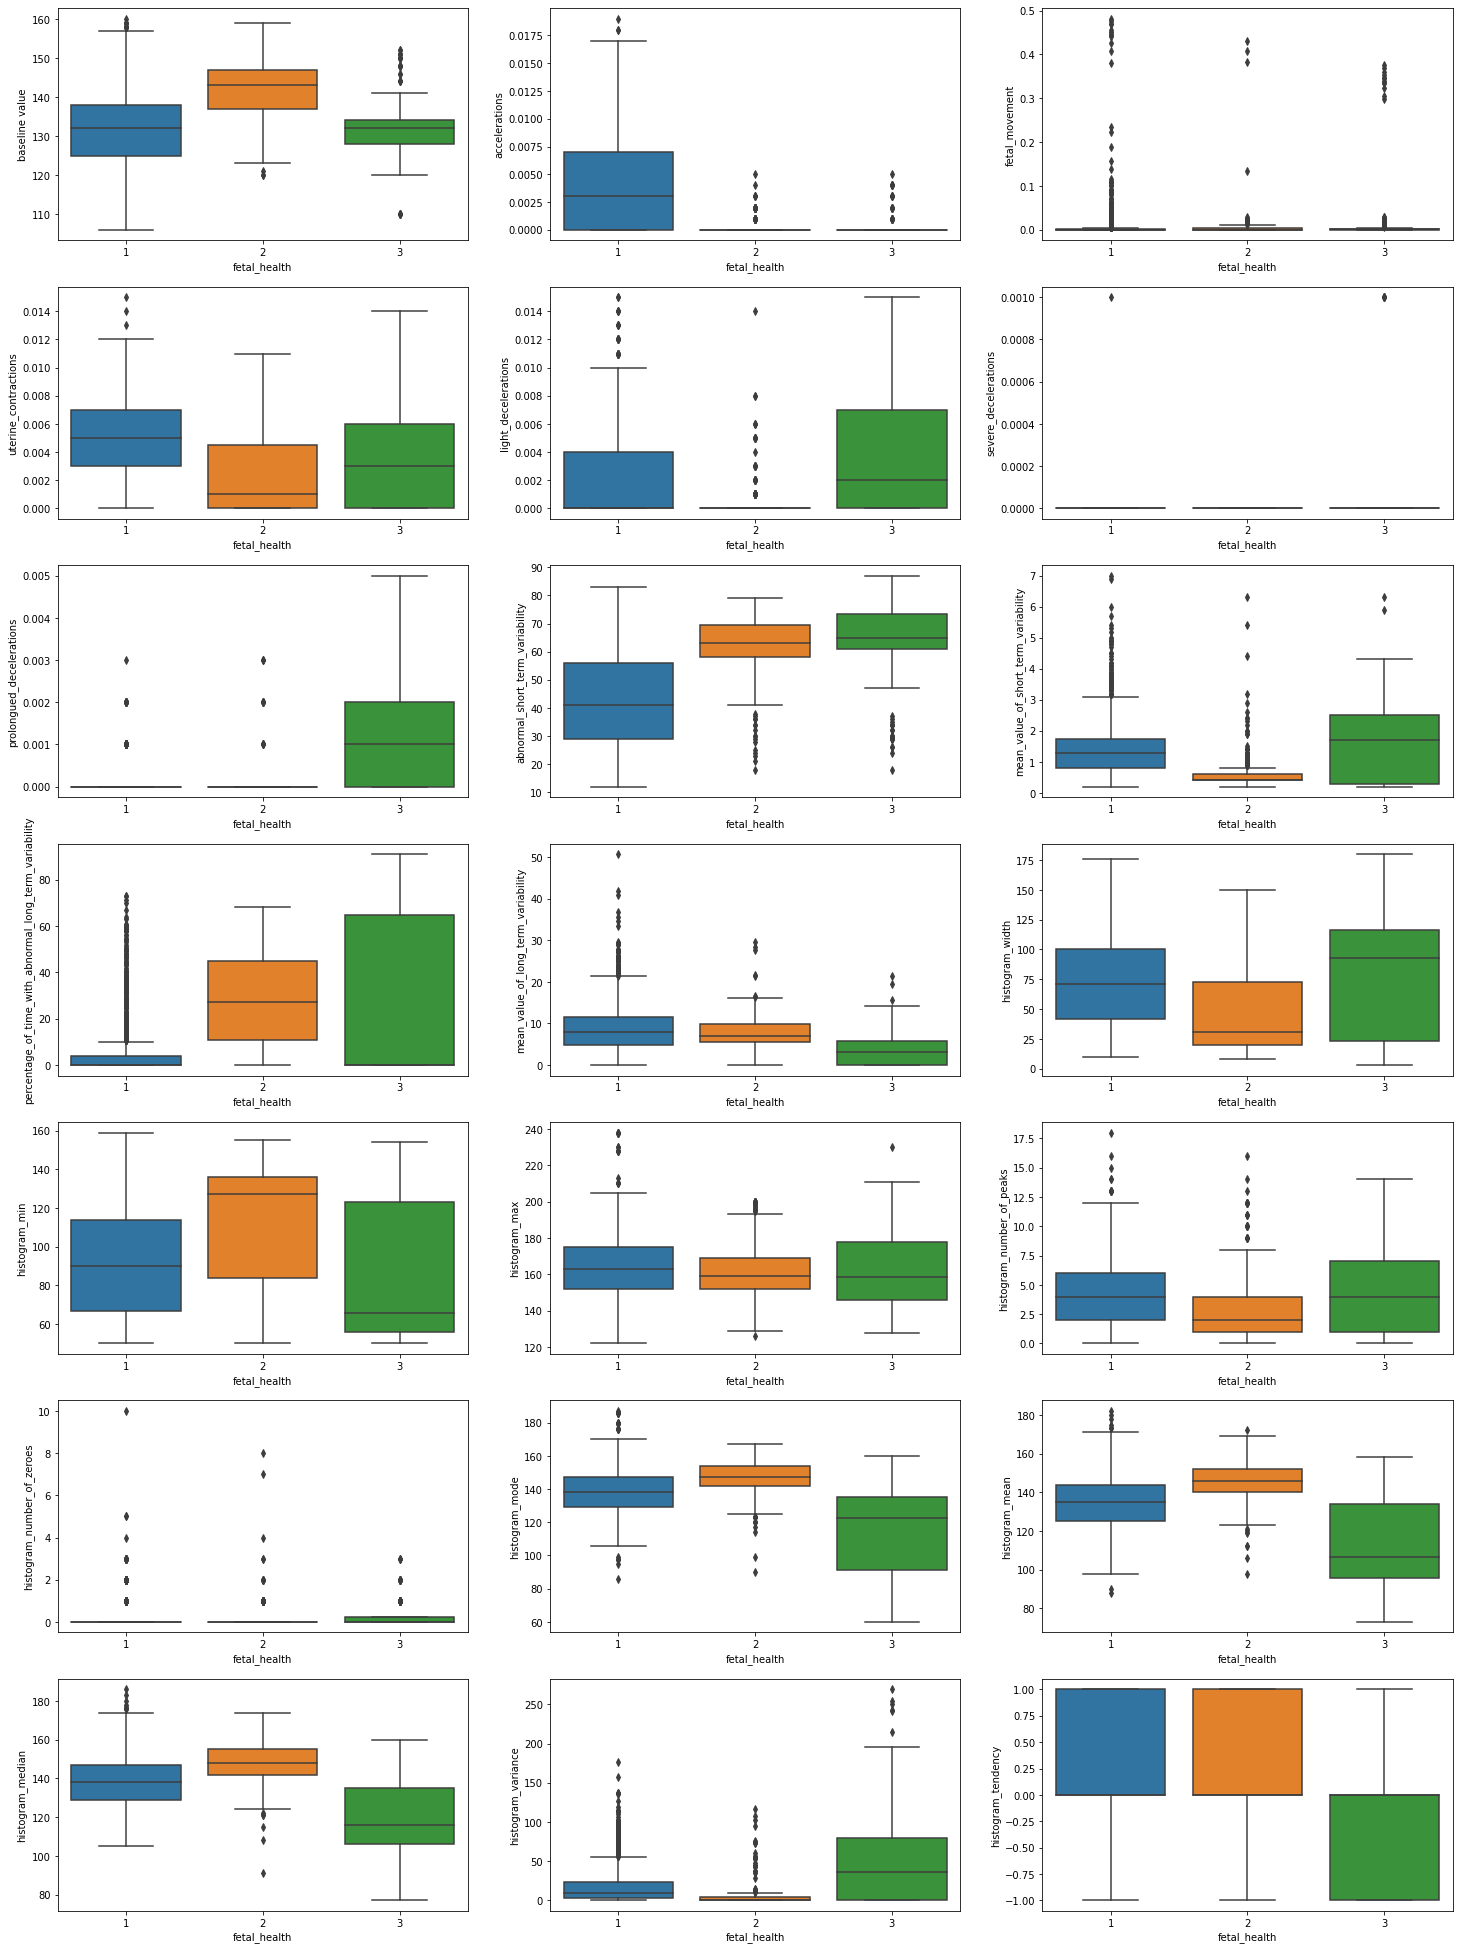

In [17]:
plt.figure(figsize=(25,35))
i=1
for feat in activities.columns:
    plt.subplot(7,3,i)
    sns.boxplot(x ='fetal_health',y = feat, data = df_health)
    i+=1

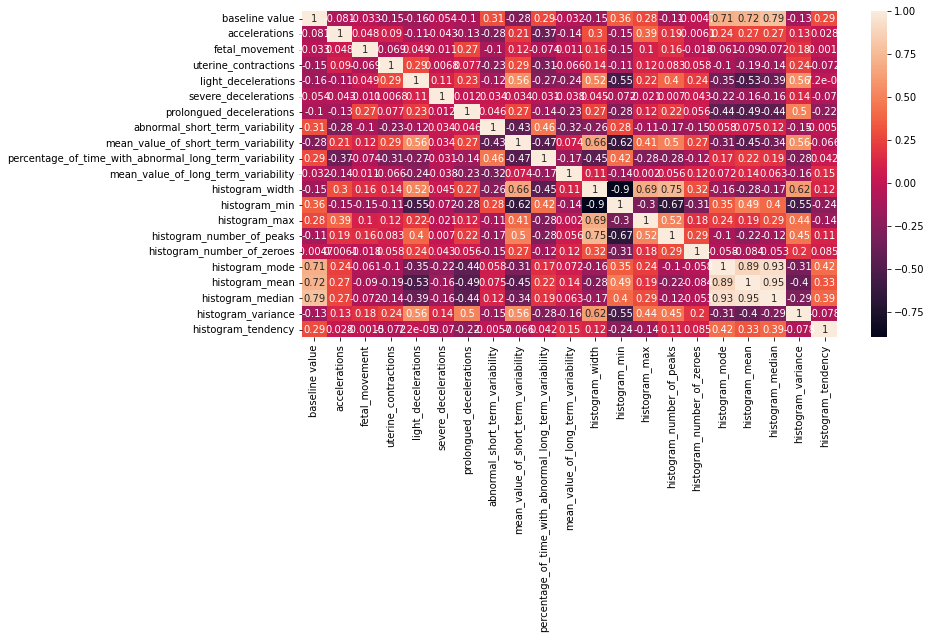

In [18]:
plt.subplots(figsize=(12,6))
correlation_matrix = activities.corr()
sns.heatmap(correlation_matrix,annot=True)

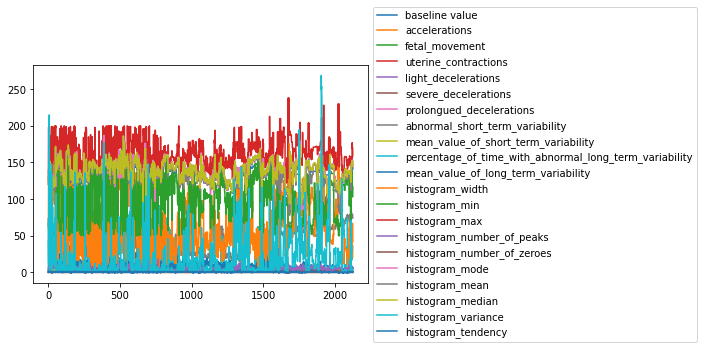

In [19]:
profile_plot = activities.plot()
profile_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [20]:
missing_values = df_health.isnull().sum()
missing_values

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

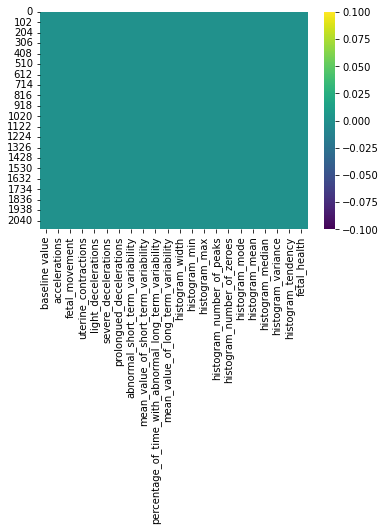

In [21]:
missing_values = df_health.isnull()
missing_values
sns.heatmap(data = missing_values, cmap='viridis')

In [22]:
X = activities
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1


In [23]:
y = df_health['fetal_health']
y.head()

0    2
1    1
2    1
3    1
4    1
Name: fetal_health, dtype: int64

In [24]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
len(X_train)

1700

In [27]:
len(y_train)

1700

In [28]:
print(X_train[0:3])

[[-0.81890715 -0.82497568 -0.20426125  1.2185553  -0.63734982 -0.06430142
  -0.26814776 -0.85965686 -0.26258884 -0.36703781  0.82903218 -0.500418
   0.09015075 -0.94749358 -0.01460696 -0.44531299 -0.68027433 -0.60330745
  -0.74290279 -0.58051372 -0.51669716]
 [ 0.69242905 -0.82497568 -0.20426125 -1.15901611 -0.63734982 -0.06430142
  -0.26814776  0.76272307 -0.60448392  1.23386142  0.51383432  1.26714595
  -0.4822035   1.97529779  1.6862038  -0.44531299  0.2222279   0.41430155
   0.28143057 -0.54596417 -0.51669716]
 [-1.12117438 -0.82497568 -0.20426125 -1.49866917 -0.29694935 -0.06430142
  -0.26814776 -1.55496255  0.53516637 -0.53264807  0.96912012 -0.80782042
   0.32582602 -1.22853121 -1.03509342 -0.44531299 -1.04127523 -0.98491083
  -1.15263613 -0.54596417 -0.51669716]]


In [29]:
print(y_train)

1233    1
480     2
1111    1
1303    1
861     1
       ..
1638    1
1095    1
1130    1
1294    1
860     1
Name: fetal_health, Length: 1700, dtype: int64


In [30]:
print(X_test[0:3])

[[-0.01286117 -0.30936588  0.00273972 -0.47971     0.04345112 -0.06430142
  -0.26814776 -0.0484669  -0.26258884 -0.53264807  1.249296   -0.03931436
   0.05648285  0.00803437  0.32555519 -0.44531299  0.10189427  0.03269817
   0.00827501 -0.33866688 -0.51669716]
 [-0.81890715 -0.82497568 -0.18356116  1.55820836  2.08585395 -0.06430142
  -0.26814776  0.87860735  0.42120134 -0.53264807 -1.25477591  0.03753625
  -0.85255037 -1.34094626  0.32555519 -0.44531299 -0.43960707 -1.17571252
  -0.87948057  0.35232411  1.11902941]
 [-0.21437267  0.20624392 -0.14216096 -0.14005694  1.06465253 -0.06430142
   1.38348701  0.76272307  0.87706146 -0.53264807 -1.2897979   0.49863989
  -0.5158714   0.23286447  1.34604165 -0.44531299 -0.25910662 -0.47610633
  -0.40145834  0.07592772 -0.51669716]]


In [31]:
print(y_test)

282     1
1999    1
1709    1
988     1
2018    1
       ..
305     2
973     1
611     1
2108    1
192     2
Name: fetal_health, Length: 426, dtype: int64


Decision tree

In [32]:
#training a decision tree classifier
# Import module for fitting
from sklearn.tree import DecisionTreeClassifier
# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
dtreemodel = DecisionTreeClassifier()
dtreemodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
x_feature = X_train
y_target = y_train

In [34]:
dtreemodel.classes_

array([1, 2, 3])

In [35]:
dtreemodel.feature_importances_

array([0.04036874, 0.03789307, 0.0180939 , 0.03723599, 0.00368571,
       0.        , 0.01994631, 0.12243639, 0.23224855, 0.1245767 ,
       0.02562335, 0.02036719, 0.01595201, 0.02077388, 0.01819779,
       0.00155292, 0.02593123, 0.21140006, 0.00677444, 0.01694178,
       0.        ])

In [36]:
#make predictions using decision tree classifier
#Predicting the target for test data
predictions = dtreemodel.predict(X_test)

In [37]:
print(X_test[0:3])
print(predictions[0:3])

[[-0.01286117 -0.30936588  0.00273972 -0.47971     0.04345112 -0.06430142
  -0.26814776 -0.0484669  -0.26258884 -0.53264807  1.249296   -0.03931436
   0.05648285  0.00803437  0.32555519 -0.44531299  0.10189427  0.03269817
   0.00827501 -0.33866688 -0.51669716]
 [-0.81890715 -0.82497568 -0.18356116  1.55820836  2.08585395 -0.06430142
  -0.26814776  0.87860735  0.42120134 -0.53264807 -1.25477591  0.03753625
  -0.85255037 -1.34094626  0.32555519 -0.44531299 -0.43960707 -1.17571252
  -0.87948057  0.35232411  1.11902941]
 [-0.21437267  0.20624392 -0.14216096 -0.14005694  1.06465253 -0.06430142
   1.38348701  0.76272307  0.87706146 -0.53264807 -1.2897979   0.49863989
  -0.5158714   0.23286447  1.34604165 -0.44531299 -0.25910662 -0.47610633
  -0.40145834  0.07592772 -0.51669716]]
[1 1 1]


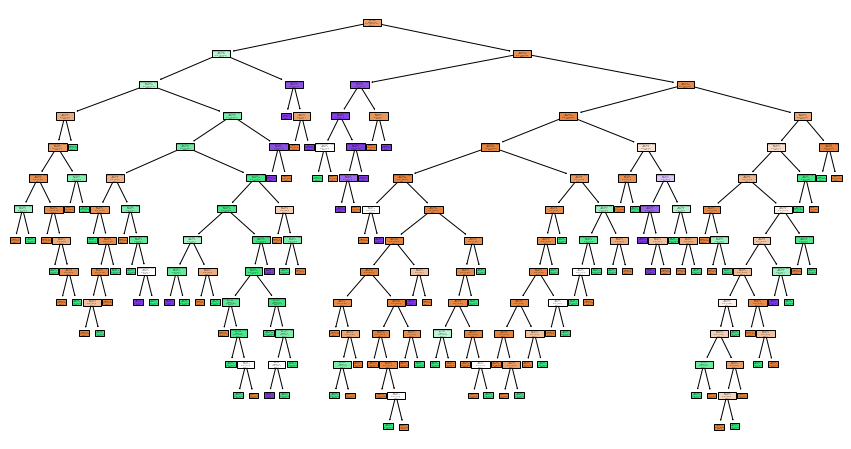

In [38]:
# visualising the decision tree
from sklearn import tree
fig = plt.figure(figsize=(15,8))
_ = tree.plot_tree(dtreemodel, 
                   feature_names= dtreemodel.feature_importances_,  
                   class_names = str(dtreemodel.classes_),
                    filled = True)

In [39]:
#Evaluate the model
dtreemodel.score(X_test, y_test)

0.9248826291079812

In [40]:
#Hyperparameter Tuning (Max Depth)
parameters = {'max_depth' : list(range(1, 6))}
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(dtreemodel,param_grid = parameters,cv=10)
search.fit(X_train, y_train)
print(search.best_score_)
print(search.best_params_)

0.9188235294117648
{'max_depth': 5}


In [41]:
#creating the final model
# Importing module for fitting
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
dtreemodel = DecisionTreeClassifier(max_depth=3)
dtreemodel.fit(X_train, y_train)

predictions = dtreemodel.predict(X_test)
print(f"{accuracy_score(y_test, predictions) * 100}")

91.78403755868545


Random forest

In [42]:
#Call the Classifier
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=500)
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [43]:
y_pred2 = model2.predict(X_test)

In [44]:
#Classification Metrics - To check the final results
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

result2 = accuracy_score(y_test, y_pred2)
print('Accuracy is: ', result2*100)

print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

Accuracy is:  95.07042253521126
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       333
           2       0.89      0.80      0.84        64
           3       0.90      0.93      0.92        29

    accuracy                           0.95       426
   macro avg       0.92      0.90      0.91       426
weighted avg       0.95      0.95      0.95       426

[[327   5   1]
 [ 11  51   2]
 [  1   1  27]]


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[327   5   1]
 [ 11  51   2]
 [  1   1  27]]


0.9507042253521126

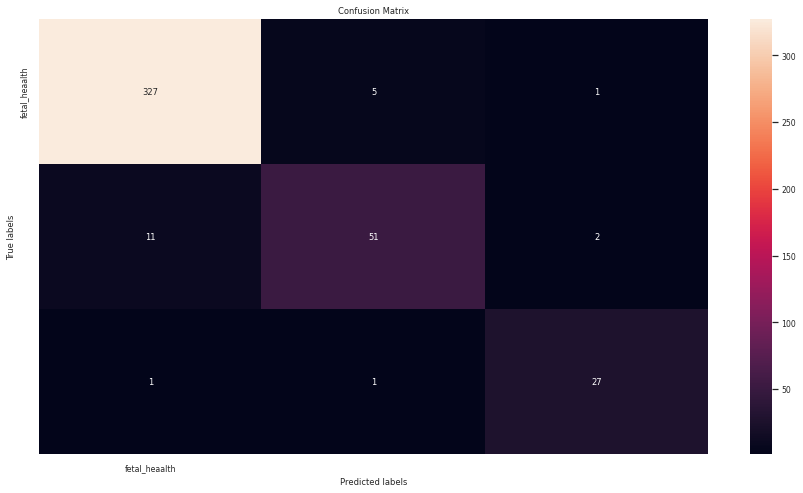

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt     

sns.set(font_scale=0.7)
plt.figure(figsize=(15, 8))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['fetal_heaalth']); ax.yaxis.set_ticklabels(['fetal_heaalth']);

XGBoost

In [47]:
!pip install xgboost
!conda install -c conda-forge xgboost

/bin/bash: conda: command not found


In [48]:
import xgboost
xgmodel = xgboost.XGBClassifier()
xgmodel.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [49]:
y_pred = xgmodel.predict(X_test)
print(accuracy_score(y_test, y_pred) * 100)

94.36619718309859


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[322   8   3]
 [ 12  52   0]
 [  1   0  28]]


0.9436619718309859

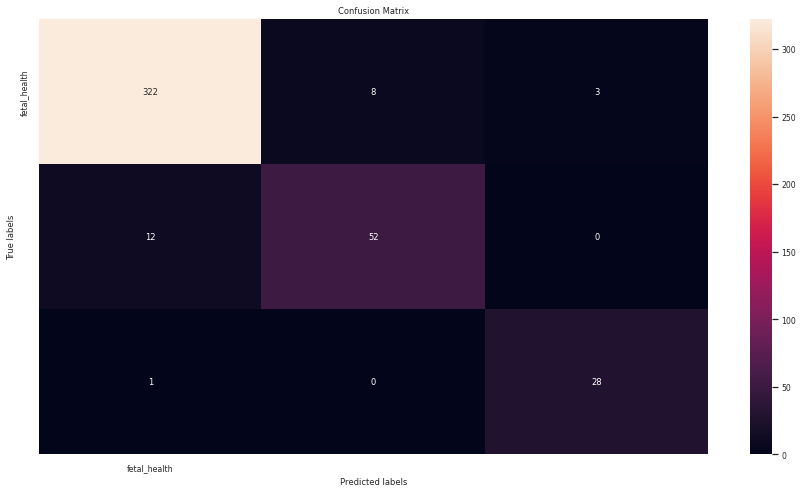

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt     

sns.set(font_scale=0.7)
plt.figure(figsize=(15, 8))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['fetal_health']); ax.yaxis.set_ticklabels(['fetal_health']);